## 1.Setup

## 1.1.Bibliotecas utilizadas 

In [1]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 1.2.Leitura dos Dados

In [2]:
df_train = pd.read_csv('train_data.csv',sep=',')

df_test = pd.read_csv('test_data.csv',sep=',')

In [3]:
#retirando dados duplicados

df_train.drop_duplicates(keep='first', inplace=True)
df_test.drop_duplicates(keep='first', inplace=True)

# 1.3 Matriz de Confusão

In [4]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# 2.Análise dos Dados

## 2.1.Features desnecessárias

Já analisadas no exercício programa anterior, features "id" e "fnlwgt" tem baixa correlação por isso serão retiradas.

In [5]:
cat_vars = [i for i in df_train.columns if df_train.dtypes[i] == 'object']
num_vars = [i for i in df_train.columns if df_train.dtypes[i] == 'int64']

## 2.2.Dados Categóricos 

In [6]:
df_train.describe(exclude = [np.number])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


Já nos dados categóricos, temos dados faltantes. A coluna "education" e "education num" (indexacao) possui o mesmo significado, por isso será retirada.

In [7]:
df_train = df_train.drop(['education'], axis=1)
df_test = df_test.drop(['education'], axis=1)

### 2.2.1.Marital Status

In [8]:
df_train["marital.status"].value_counts()

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [9]:
group = {'Married-AF-spouse':'Others','Married-spouse-absent':'Others','Widowed':'Others','Separated':'Divorced'}

df_train['marital.status'] = df_train['marital.status'].apply(lambda x: group.get(x, x))
df_test['marital.status'] = df_test['marital.status'].apply(lambda x: group.get(x, x))

Agrupamento de variáveis com menores valores, e junção de separados com divorciados

### 2.2.2.Race 

In [10]:
df_train["race"].value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [11]:
group = {'Amer-Indian-Eskimo': 'Other'}

df_train['race'] = df_train['race'].apply(lambda x: group.get(x, x))
df_test['race'] = df_test['race'].apply(lambda x: group.get(x, x))

### 2.2.3.Native Country 

In [12]:
df_train["native.country"].value_counts()

United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [13]:
def nat_country(x):
    if x in ['United-States','?','Mexico']:
        return x
    return 'Other'


df_train['native.country'] = df_train['native.country'].apply(lambda x: nat_country(x))
df_test['native.country'] = df_test['native.country'].apply(lambda x: nat_country(x))

## 2.3.Dados Faltantes

In [14]:
cat_vars = [i for i in df_train.columns if df_train.dtypes[i] =='object']
num_vars = [i for i in df_train.columns if df_train.dtypes[i] =='int64']

In [15]:
cat_vars_tot = [i for i in df_train.columns if df_train.dtypes[i] == 'object']
cat_vars = [x for x in cat_vars if x != 'income']
num_vars = [i for i in df_train.columns if df_train.dtypes[i] == 'int64']
print(cat_vars)
print(num_vars)

['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
['Id', 'age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(df_train.drop('income',axis = 1),df_train['income'],test_size = 0.2)
print(x_train)

          Id  age         workclass  fnlwgt  education.num  \
1628   17908   49  Self-emp-not-inc  162856             10   
20961  37241   51         Local-gov   33863             14   
21869  38149   29           Private   75648             10   
1530   17810   19                 ?  180976              6   
1416   17696   31           Private  182237              6   
...      ...  ...               ...     ...            ...   
30986  47266   20           Private  190273              8   
25723  42003   27                 ?  190650             13   
21518  37798   46           Private  126513              9   
6825   23105   46  Self-emp-not-inc  110015              4   
3176   19456   20           Private  381357              5   

           marital.status         occupation   relationship  \
1628             Divorced    Exec-managerial  Not-in-family   
20961  Married-civ-spouse     Prof-specialty        Husband   
21869  Married-civ-spouse       Craft-repair        Husband   
153

In [17]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
num_trans = Pipeline(steps = [('imputer' , SimpleImputer()),
                             ('scaler' , StandardScaler())])
cat_trans = Pipeline(steps = [('imputer' , SimpleImputer(strategy = 'most_frequent')),
                             ('encoder' , OneHotEncoder(handle_unknown = 'ignore'))])
prep = ColumnTransformer(transformers = [('num', num_trans, num_vars),
                                        ('cat', cat_trans, cat_vars)])

# 3.Modelos

## 3.1. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier()

dist_Param_rf = dict()
dist_Param_rf['n_estimators'] = [10,50,100,200]
dist_Param_rf['criterion'] = ['gini', 'entropy', 'log_loss']


rf_random_search = RandomizedSearchCV(rf_model,dist_Param_rf)

model_rf = Pipeline(steps = [('preprocessor', prep),
                            ('model', rf_random_search)])

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(df_train.drop('income',axis = 1),df_train['income'],test_size = 0.2)

model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_val)

C:\Users\matus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\matus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\matus\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matus\anaconda3\lib\site-packages\jo

In [21]:
y_pred = model_rf.predict(x_val)

In [22]:
model_rf['model'].best_params_

{'n_estimators': 100, 'criterion': 'gini'}

In [23]:
model_rf['model'].best_score_

0.8605652257701035

Análise da matriz de confusão

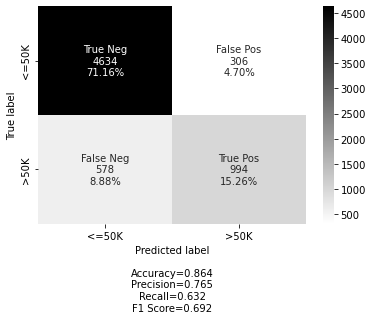

In [24]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_val, y_pred, labels=["<=50K", ">50K"])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['<=50K', '>50K']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [25]:
from sklearn.metrics import recall_score, precision_score, f1_score,roc_auc_score, accuracy_score

dict_trans_income = {'<=50K' : 0 , '>50K' : 1}
y_val_bin = pd.Series(y_val).apply(lambda x : dict_trans_income[x])
y_pred_bin = pd.Series(y_pred).apply(lambda x : dict_trans_income[x])
df_dict_rf = {'Modelo' : ['Random Forest'] , 
              'Acurácea' : [accuracy_score(y_val_bin,y_pred_bin)],
             'Precisão' : [precision_score(y_val_bin,y_pred_bin)],
              'Recall' : [recall_score(y_val_bin,y_pred_bin)],
             'F1' : [f1_score(y_val_bin,y_pred_bin)],
             'AUC' : [roc_auc_score(y_val_bin,y_pred_bin)]}
df_rf = pd.DataFrame(data = df_dict_rf)
print(df_rf)

          Modelo  Acurácea  Precisão    Recall        F1       AUC
0  Random Forest  0.864251  0.764615  0.632316  0.692201  0.785186


## 3.2. Gradient Boosting Classifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier()

params_GBC = {'loss' : ['log_loss','exponential'],
              'n_estimators' : [100,200,300],
             'criterion' : ['friedman_mse' , 'squared_error']}


GBC_random_search = RandomizedSearchCV(GBC_model,params_GBC)

model_GBC = Pipeline(steps = [('preprocessor' , prep) , 
                             ('model' , GBC_random_search)])

In [27]:
model_GBC.fit(x_train,y_train)
y_pred1 = model_GBC.predict(x_val)

C:\Users\matus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\matus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\matus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss

In [28]:
model_GBC['model'].best_params_

{'n_estimators': 300, 'loss': 'exponential', 'criterion': 'friedman_mse'}

In [29]:
model_GBC['model'].best_score_

0.8683969093798604

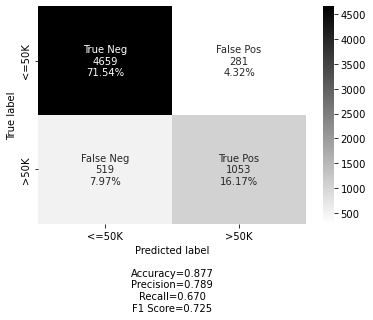

In [30]:
cf_matrix = confusion_matrix(y_val,y_pred1,labels = ['<=50K','>50K'])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['<=50K', '>50K']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [31]:
y_pred1_bin = pd.Series(y_pred1).apply(lambda x : dict_trans_income[x])
df_dict_GBC = {'Modelo' : ['Gradient Boosting'] , 
              'Acurácea' : [accuracy_score(y_val_bin,y_pred1_bin)],
             'Precisão' : [precision_score(y_val_bin,y_pred1_bin)],
              'Recall' : [recall_score(y_val_bin,y_pred1_bin)],
             'F1' : [f1_score(y_val_bin,y_pred1_bin)],
             'AUC' : [roc_auc_score(y_val_bin,y_pred1_bin)]}
df_GBC = pd.DataFrame(data = df_dict_GBC)
print(df_GBC)

              Modelo  Acurácea  Precisão    Recall        F1       AUC
0  Gradient Boosting   0.87715  0.789355  0.669847  0.724708  0.806482


## 3.3. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

lg_model = LogisticRegression()

params_lg = {'penalty' : ['l1', 'l2', 'elasticnet'],
             'solver' : ['lbfgs' , 'sag' , 'newton-cg'],
             'C' : loguniform(1e-5,100)}

lg_random_search = RandomizedSearchCV(lg_model,params_lg)

model_lg = Pipeline(steps = [('preprocessing', prep),
                    ('model' , lg_random_search)])

In [33]:
model_lg.fit(x_train,y_train)
y_pred2 = model_lg.predict(x_val)

C:\Users\matus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 f

In [34]:
model_lg['model'].best_params_

{'C': 2.990288621326892, 'penalty': 'l2', 'solver': 'sag'}

In [35]:
model_lg['model'].best_score_

0.8488176708774751

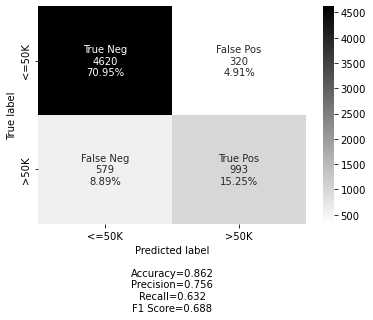

In [36]:
cf_matrix = confusion_matrix(y_val,y_pred2,labels = ['<=50K','>50K'])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['<=50K', '>50K']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [37]:
y_pred2_bin = pd.Series(y_pred2).apply(lambda x : dict_trans_income[x])
df_dict_lg = {'Modelo' : ['Logistic Regression'] , 
              'Acurácea' : [accuracy_score(y_val_bin,y_pred2_bin)],
             'Precisão' : [precision_score(y_val_bin,y_pred2_bin)],
              'Recall' : [recall_score(y_val_bin,y_pred2_bin)],
             'F1' : [f1_score(y_val_bin,y_pred2_bin)],
             'AUC' : [roc_auc_score(y_val_bin,y_pred2_bin)]}
df_lg = pd.DataFrame(data = df_dict_lg)
print(df_lg)

                Modelo  Acurácea  Precisão    Recall        F1       AUC
0  Logistic Regression  0.861947  0.756283  0.631679  0.688388  0.783451


## 3.4. Multi Layer Perceptron (MLP)

In [38]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier()

params_mlp = {'hidden_layer_sizes' : [100],
              'activation' : [ 'logistic' , 'relu'],
              'solver' : ['lbfgs' , 'adam'],
             'max_iter' : [200]}

random_search_mlp = RandomizedSearchCV(MLP_model,params_mlp)

model_MLP = Pipeline(steps = [('preprocessing' , prep) , 
                             ('model' , random_search_mlp)])

In [39]:
model_MLP.fit(x_train,y_train)
y_pred3 = model_MLP.predict(x_val)

C:\Users\matus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\matus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\matus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_ite

In [40]:
model_MLP['model'].best_params_

{'solver': 'adam',
 'max_iter': 200,
 'hidden_layer_sizes': 100,
 'activation': 'logistic'}

In [41]:
model_MLP['model'].best_score_

0.8562655657619012

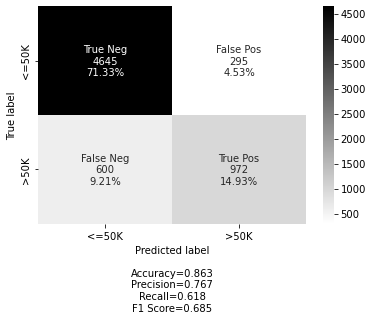

In [42]:
cf_matrix = confusion_matrix(y_val,y_pred3,labels = ['<=50K','>50K'])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['<=50K', '>50K']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [43]:
y_pred3_bin = pd.Series(y_pred3).apply(lambda x : dict_trans_income[x])
df_dict_MLP = {'Modelo' : ['Multi Layer Perceptron'] , 
              'Acurácea' : [accuracy_score(y_val_bin,y_pred3_bin)],
             'Precisão' : [precision_score(y_val_bin,y_pred3_bin)],
              'Recall' : [recall_score(y_val_bin,y_pred3_bin)],
             'F1' : [f1_score(y_val_bin,y_pred3_bin)],
             'AUC' : [roc_auc_score(y_val_bin,y_pred3_bin)]}
df_MLP = pd.DataFrame(data = df_dict_MLP)
print(df_MLP)

                   Modelo  Acurácea  Precisão    Recall        F1       AUC
0  Multi Layer Perceptron  0.862561  0.767167  0.618321  0.684748  0.779302


# 4. Análise dos Resultados

In [44]:
df_final = pd.concat([df_rf,df_GBC,df_lg,df_MLP])
print(df_final)

print("\nScore Random-Forest: {}".format(model_rf['model'].best_score_))
print("Score GBC: {}".format(model_GBC['model'].best_score_))
print("Score Regressao Logistica: {}".format(model_lg['model'].best_score_))
print("Score MLP: {}".format(model_MLP['model'].best_score_))

                   Modelo  Acurácea  Precisão    Recall        F1       AUC
0           Random Forest  0.864251  0.764615  0.632316  0.692201  0.785186
0       Gradient Boosting  0.877150  0.789355  0.669847  0.724708  0.806482
0     Logistic Regression  0.861947  0.756283  0.631679  0.688388  0.783451
0  Multi Layer Perceptron  0.862561  0.767167  0.618321  0.684748  0.779302

Score Random-Forest: 0.8605652257701035
Score GBC: 0.8683969093798604
Score Regressao Logistica: 0.8488176708774751
Score MLP: 0.8562655657619012


Como GBC teve os melhores indicadores de score, accuracy, etc. será usado esse para a submissao

## 4.1 Submissão

In [45]:
model = model_GBC

In [46]:
model = model_GBC.fit(df_train.drop(columns = ['income']),df_train['income'])

C:\Users\matus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\matus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\matus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss

In [47]:
model['model'].best_params_

{'n_estimators': 100, 'loss': 'exponential', 'criterion': 'friedman_mse'}

In [48]:
model['model'].best_score_

0.8642506142506143

In [49]:
y_pred = model.predict(df_test.drop(columns = ['Id']))

KeyError: "['Id'] not in index"

In [ ]:
final_pred = pd.DataFrame(columns = ['Id','income'])

final_pred.Id = df_test.Id
final_pred.income = y_pred

In [ ]:
final_pred.to_csv("submission.csv", index=False)